In [80]:
%matplotlib inline
import thinkstats2
import hinc
import hinc2
import thinkplot
import density
import numpy as np
df = hinc.ReadData()
df.head()




/Users/kylemix/ds/metis/metisgh/prework/ThinkStats2/code/hinc.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[0][0] -= 1


,income,freq,cumsum,ps
0,4999,4204,4204,0.034330
1,9999,4729,8933,0.072947
2,14999,6982,15915,0.129963
3,19999,7157,23072,0.188407
4,24999,7131,30203,0.246640


In [121]:
def InterpolateSample(df, logUpper=6.0):
    # creat logUpper column, which is income converted to log10
    df['logUpper']= np.log10(df.income)
    # shift the values in logUpper up by one position, and name the new column logLower
    df['logLower'] = df.logUpper.shift(1)
    # insert a lower boundry value of 3.0 or $1000
    df.logLower[0] = 3.0
    # insert an upper boundry value of 6.0 or $1000000
    df.logUpper[41]= logUpper
    # define an array where we will combine the values of logUpper and logLower based on their ferq
    arrays = []
    # iterates through rows in df
    for _, row in df.iterrows():
    #linspace provides freq # of evenly spaced values starting at lower, stopping at upper
    # and assigns them to vals
        vals = np.linspace(start=row.logLower, stop=row.logUpper, num=row.freq)
    # write the vals for each row as a new sub array in arrays
        arrays.append(vals)
    # concatenate arrays to create a sample list of incomes distributed by their frequencies 
    # in the upper and lower bounds of the bucket to which they belong, expressed as log10
    logSample = np.concatenate(arrays)
    return logSample

logSample = InterpolateSample(df, 6.0)


/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kylemix/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


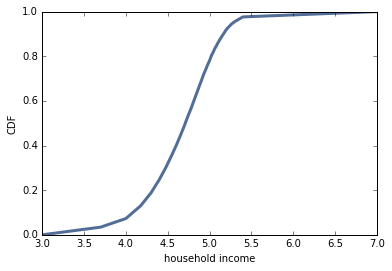

In [123]:
def logCdf(logSample):
    # create cdf of the sample we just built
    logCDF = thinkstats2.Cdf(logSample)
    # graph that sample to show household income distribution
    thinkplot.Cdf(logCDF)
    thinkplot.Show(xlabel='household income',
                       ylabel='CDF')
logCdf(InterpolateSample(df))

In [157]:

# convert logSampl values from log10 values to log1
sample = np.power(10,logSample)
mean, median = density.Summarize(sample)
cdf = thinkstats2.Cdf(sample)
cdf[mean]


mean 74278.7075312
std 93946.9299635
median 51226.4544789
skewness 4.94992024443
pearson skewness 0.736125801914


0.66000587956687196

/Users/kylemix/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


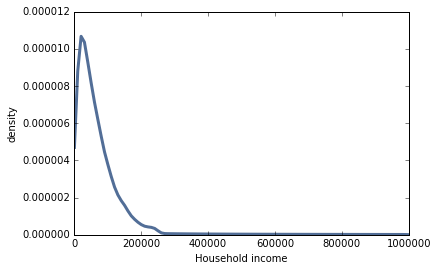

In [105]:
sampPdf = thinkstats2.EstimatedPdf(sample)
# sampPdf = thinkstats2.NormalPdf(sample)
thinkplot.Pdf(sampPdf)
thinkplot.show(xlabel='Household income', ylabel='density')